In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")

In [ ]:
print(df.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


**Descriptive Analytics for Numerical Columns**

In [ ]:
# Identifing numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [ ]:
# Calculate statistics for numerical columns
for col in numerical_cols:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")


Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


**Data Visualization**

Histogram

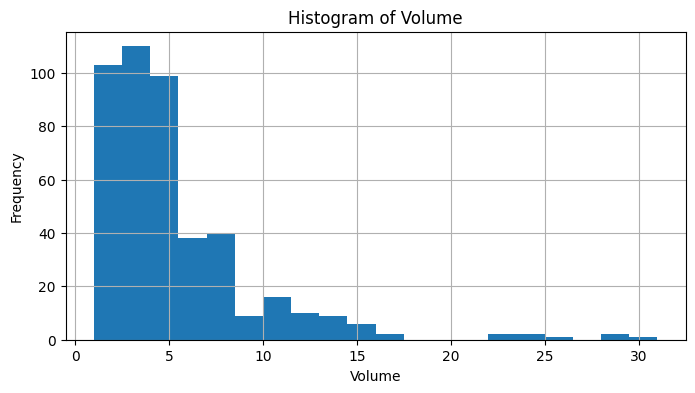

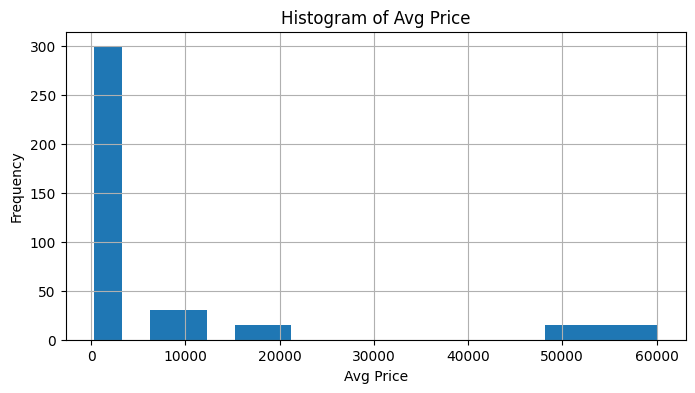

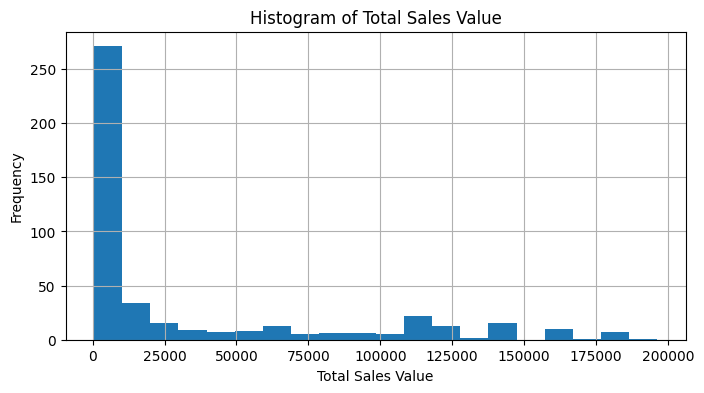

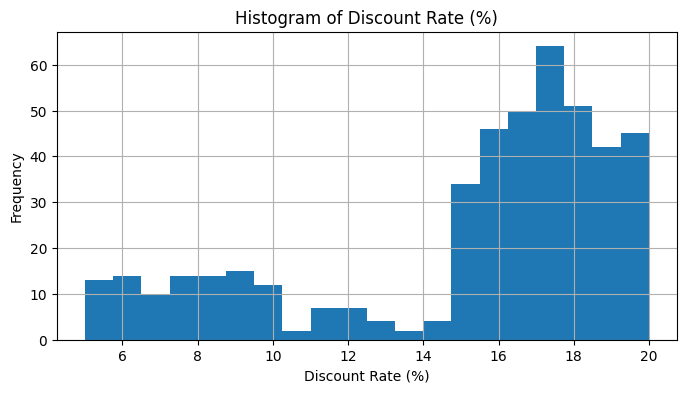

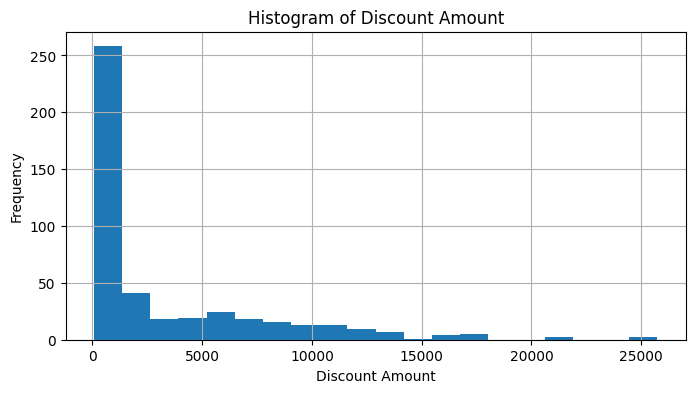

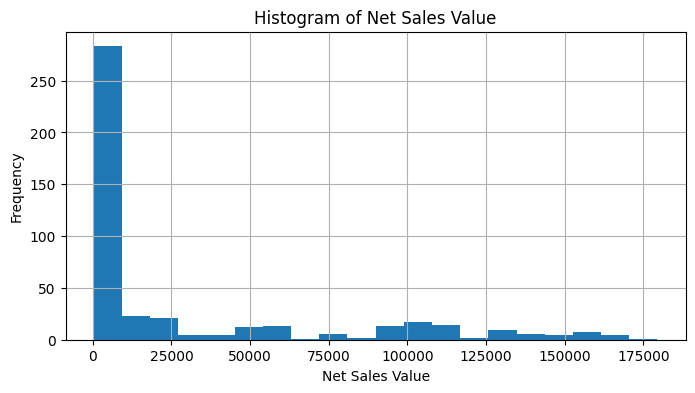

In [ ]:
# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Boxplot

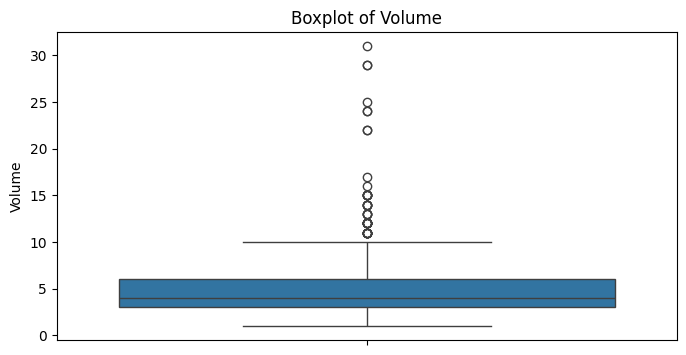

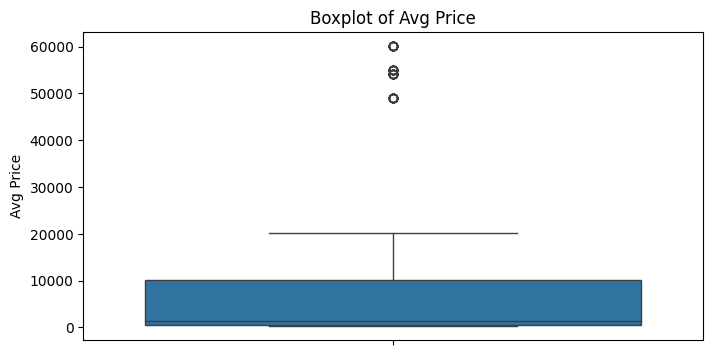

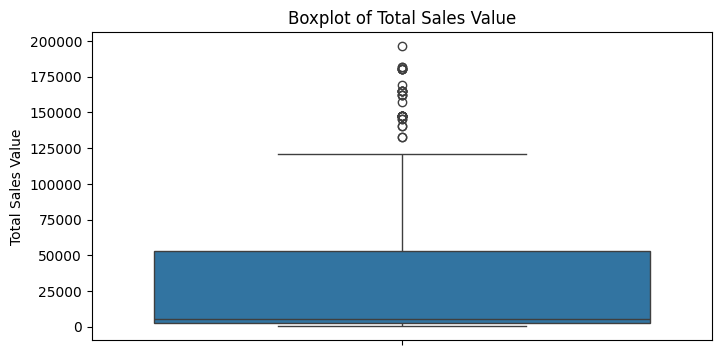

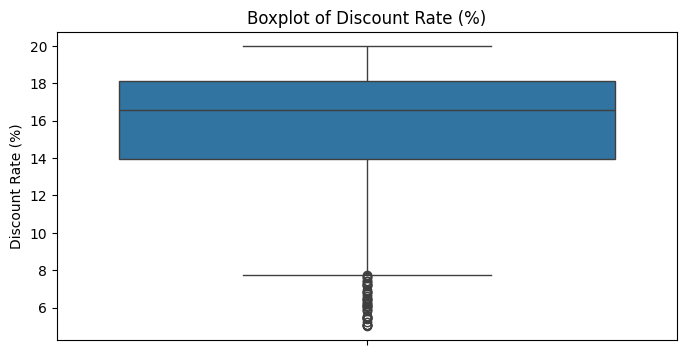

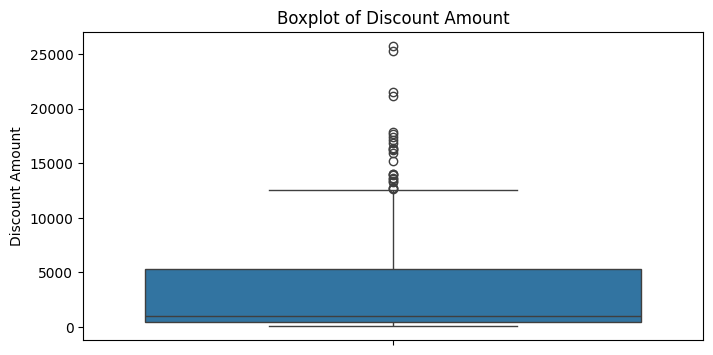

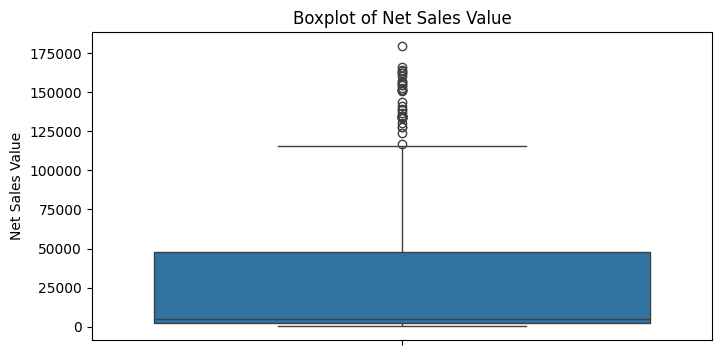

In [ ]:
# Plot boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Barplot for categorial columns

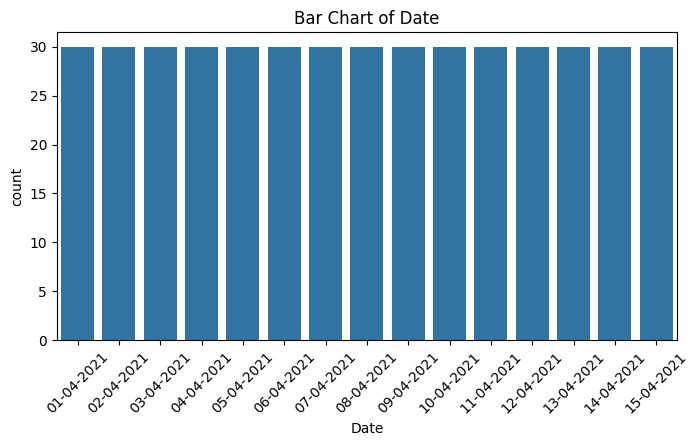

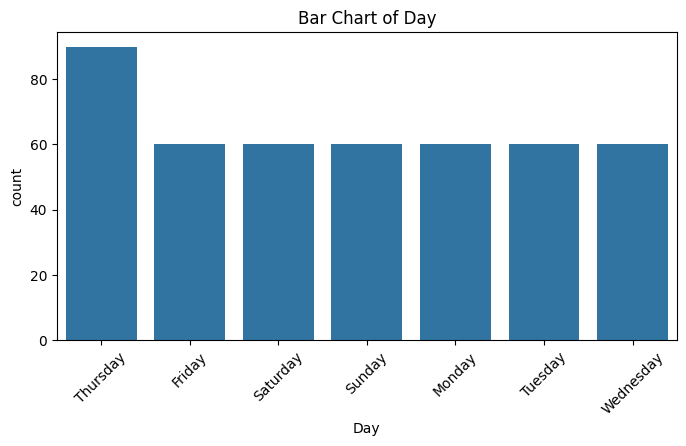

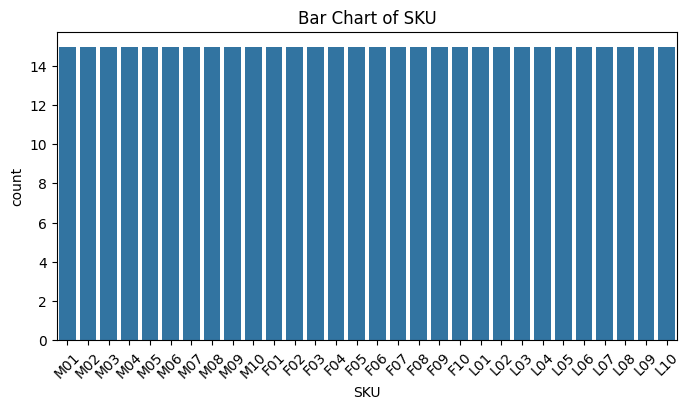

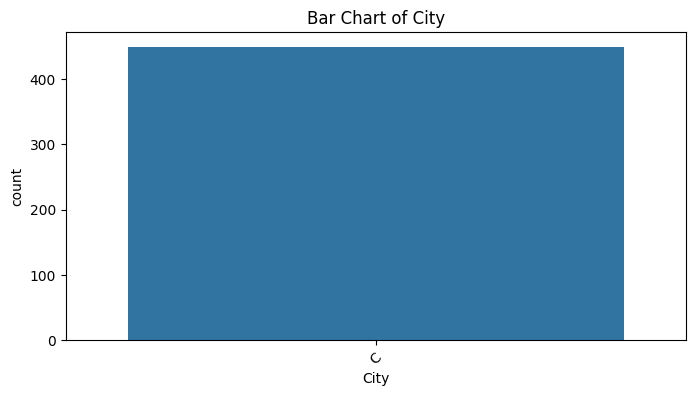

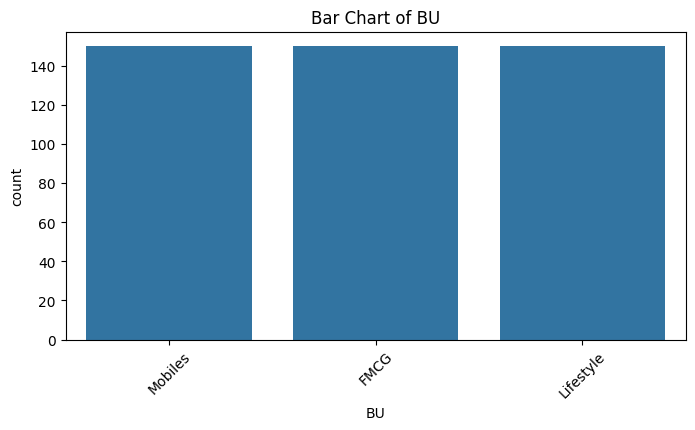

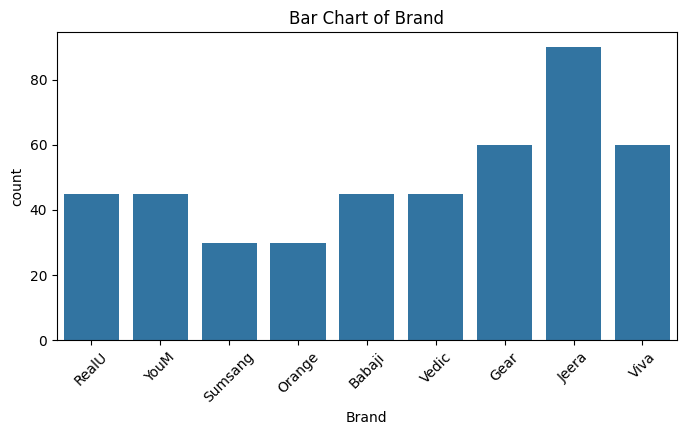

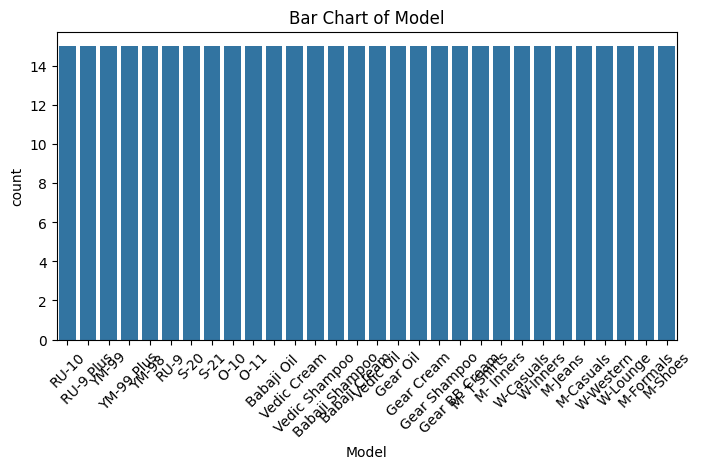

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
    plt.show()


**Standardization of Numerical Variables**


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64


**z-score normalization**

Ensures features with different scales contribute equally to the model, improving performance and convergence speed.

In [ ]:
# Calculate means and standard deviations
means = df[numerical_cols].mean()
stds = df[numerical_cols].std()

In [ ]:
# Standardize the numerical columns
df_standardized = df.copy()
df_standardized[numerical_cols] = (df[numerical_cols] - means) / stds

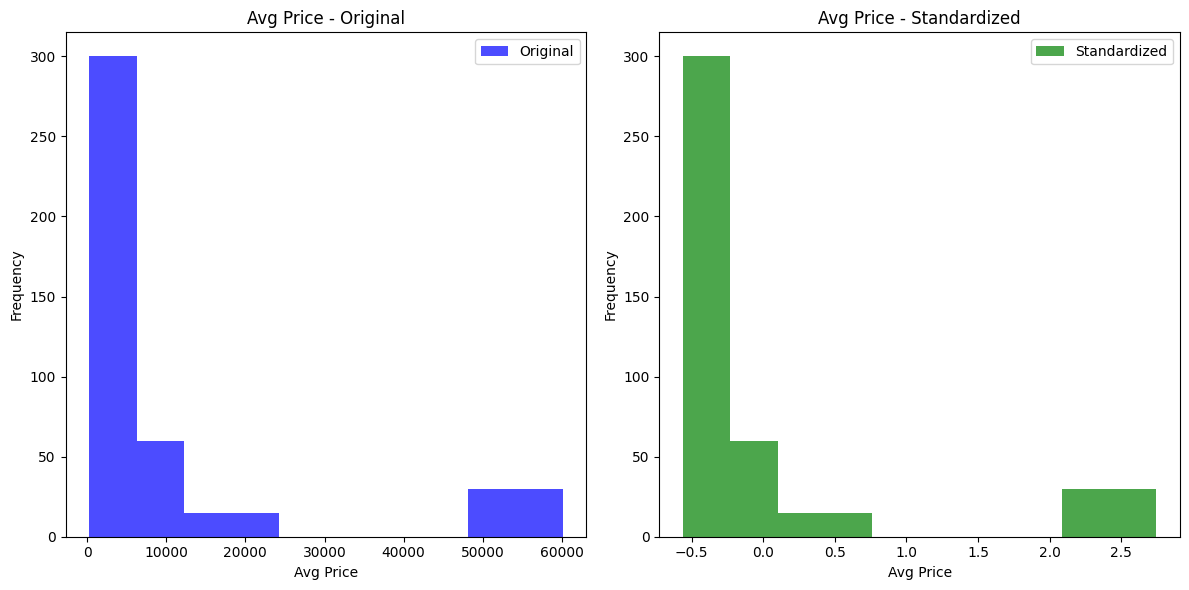

In [ ]:
# Plot distributions before and after standardization for Avg Price
col = 'Avg Price'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df[col], bins=10, color='blue', alpha=0.7, label='Original')
plt.title(f'{col} - Original')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_standardized[col], bins=10, color='green', alpha=0.7, label='Standardized')
plt.title(f'{col} - Standardized')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

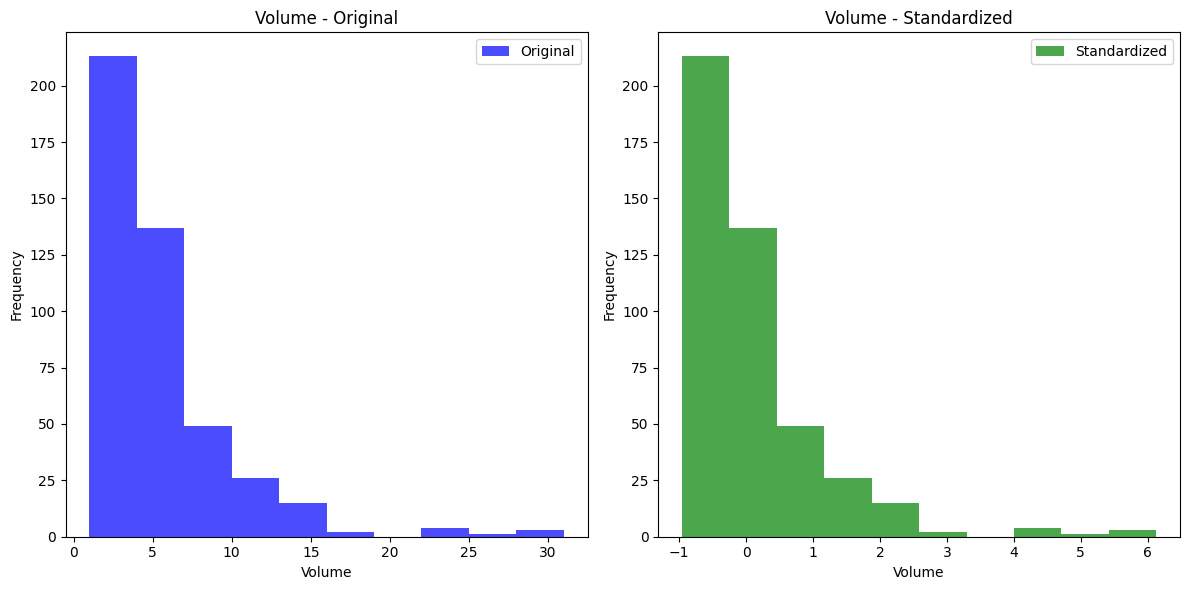

In [ ]:
# Plot distributions before and after standardization for Volume
col = 'Volume'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df[col], bins=10, color='blue', alpha=0.7, label='Original')
plt.title(f'{col} - Original')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_standardized[col], bins=10, color='green', alpha=0.7, label='Standardized')
plt.title(f'{col} - Standardized')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

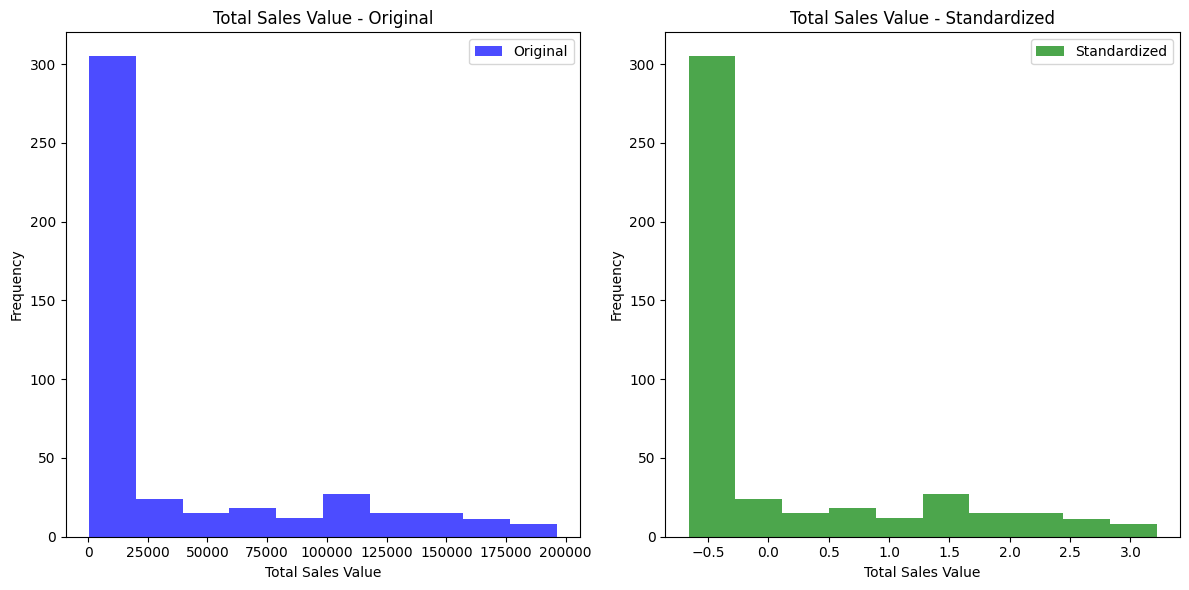

In [ ]:
# Plot distributions before and after standardization for Total Sales Value
col = 'Total Sales Value'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df[col], bins=10, color='blue', alpha=0.7, label='Original')
plt.title(f'{col} - Original')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_standardized[col], bins=10, color='green', alpha=0.7, label='Standardized')
plt.title(f'{col} - Standardized')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

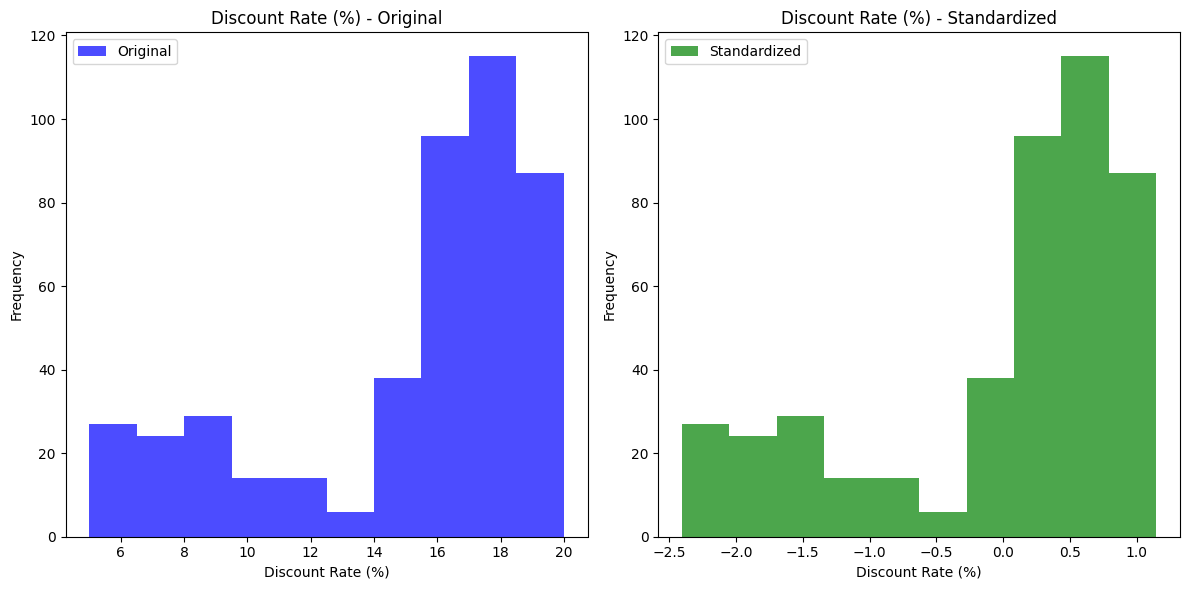

In [ ]:
# Plot distributions before and after standardization for Discount Rate (%)
col = 'Discount Rate (%)'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df[col], bins=10, color='blue', alpha=0.7, label='Original')
plt.title(f'{col} - Original')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_standardized[col], bins=10, color='green', alpha=0.7, label='Standardized')
plt.title(f'{col} - Standardized')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

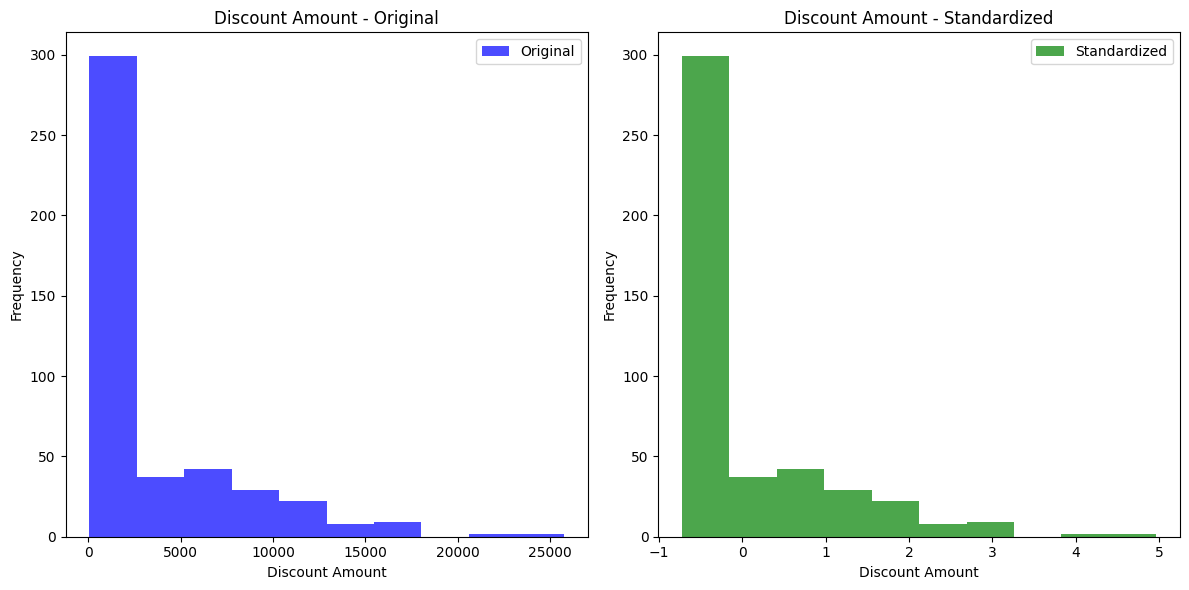

In [ ]:
# Plot distributions before and after standardization for Discount Amount
col = 'Discount Amount'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df[col], bins=10, color='blue', alpha=0.7, label='Original')
plt.title(f'{col} - Original')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_standardized[col], bins=10, color='green', alpha=0.7, label='Standardized')
plt.title(f'{col} - Standardized')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

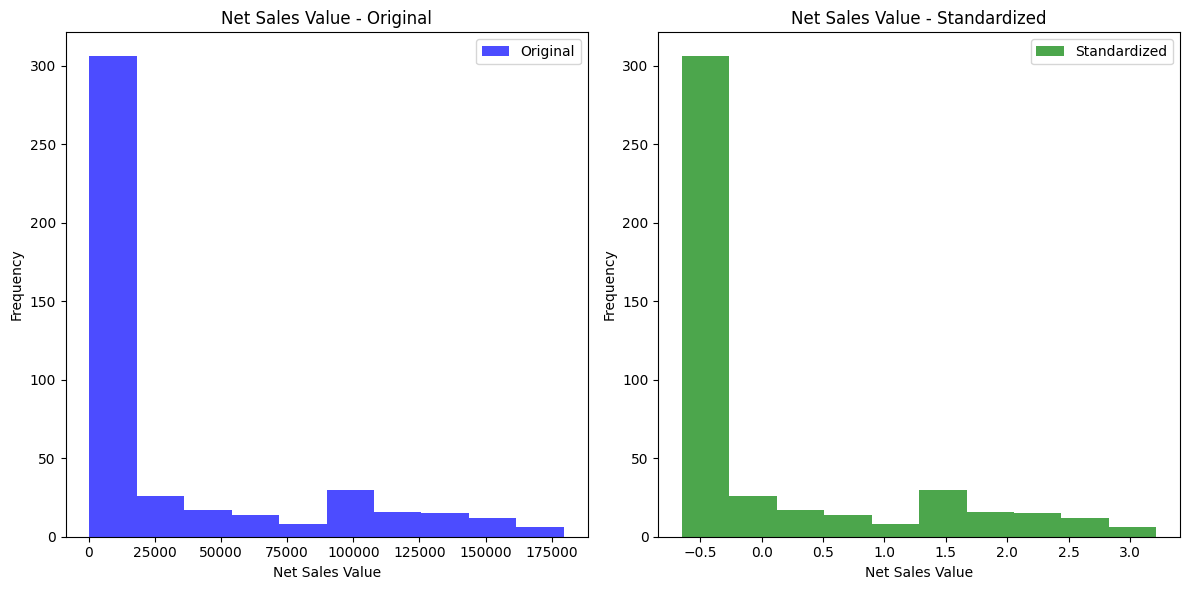

In [ ]:
# Plot distributions before and after standardization for Net Sales Valu
col = 'Net Sales Value'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df[col], bins=10, color='blue', alpha=0.7, label='Original')
plt.title(f'{col} - Original')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_standardized[col], bins=10, color='green', alpha=0.7, label='Standardized')
plt.title(f'{col} - Standardized')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**Conversion of Categorical Data into Dummy Variables**

One-Hot Encoding

Converts categorical variables into a format suitable for machine learning algorithms, enabling better model training.

In [ ]:
# Identify categorical columns
categorical_columns = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_standardized, columns=categorical_columns, drop_first=True)

In [ ]:
print(df_encoded.head())

         Date    Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0  01-04-2021  2.347417   0.091072           2.922469          -0.829365   
1  01-04-2021  1.165831  -0.019548           1.329516          -0.851714   
2  01-04-2021  0.456880   0.312312           1.561038          -1.350129   
3  01-04-2021  0.220563   0.533552           1.717365          -1.947555   
4  01-04-2021 -0.488389  -0.130168          -0.188242           0.672990   

   Discount Amount  Net Sales Value  Day_Monday  Day_Saturday  Day_Sunday  \
0         3.948422         2.801638       False         False       False   
1         1.846958         1.269613       False         False       False   
2         1.621190         1.543957       False         False       False   
3         1.112568         1.763847       False         False       False   
4         0.227598        -0.227342       False         False       False   

   ...  Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  \
0  ...       